In [8]:
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv(r"C:\Users\bhaga\Downloads\BATTING STATS - IPL_2016.csv")

In [10]:
df

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38
1,2,David Warner,17,17,3,848,93*,60.57,560,151.42,0,9,88,31
2,3,AB de Villiers,16,16,3,687,129*,52.84,407,168.79,1,6,57,37
3,4,Gautam Gambhir,15,15,2,501,90*,38.53,411,121.89,0,5,54,6
4,5,Shikhar Dhawan,17,17,4,501,82*,38.53,429,116.78,0,4,51,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,Swapnil Singh,1,1,0,0,0*,0.00,1,0.00,0,0,0,0
132,133,Unmukt Chand,1,1,0,0,0*,0.00,4,0.00,0,0,0,0
133,134,Adam Zampa,5,1,0,0,0*,0.00,1,0.00,0,0,0,0
134,135,Shivil Kaushik,7,2,1,0,0*,0.00,1,0.00,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     136 non-null    int64  
 1   Player  136 non-null    object 
 2   Mat     136 non-null    int64  
 3   Inns    136 non-null    int64  
 4   NO      136 non-null    int64  
 5   Runs    136 non-null    int64  
 6   HS      136 non-null    object 
 7   Avg     136 non-null    float64
 8   BF      136 non-null    int64  
 9   SR      136 non-null    float64
 10  100     136 non-null    int64  
 11  50      136 non-null    int64  
 12  4s      136 non-null    int64  
 13  6s      136 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 15.0+ KB


Accuracy: 0.9642857142857143
Confusion Matrix:
[[13  0  0  0]
 [ 0  1  0  1]
 [ 0  0 10  0]
 [ 0  0  0  3]]


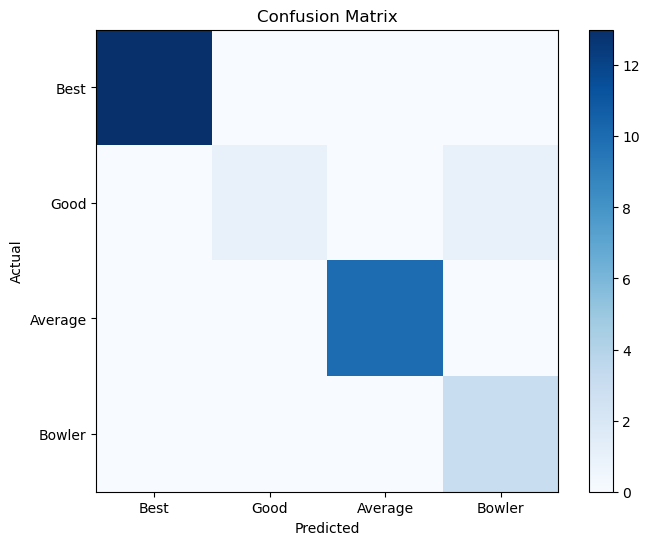

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the DataFrame
# Assuming df is your DataFrame containing the cricket player data

# Define the categories based on average runs
def categorize_player(row):
    if row['Avg'] >= 40:
        return 'Best'
    elif row['Avg'] >= 30:
        return 'Good'
    elif row['Avg'] >= 20:
        return 'Average'
    else:
        return 'Bowler'

df['Category'] = df.apply(categorize_player, axis=1)

# Define features and target variable
X = df[['Runs', 'Avg', 'SR', '100', '50', '4s', '6s']]
y = df['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict categories for test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=range(len(df['Category'].unique())), labels=df['Category'].unique())
plt.yticks(ticks=range(len(df['Category'].unique())), labels=df['Category'].unique())
plt.show()


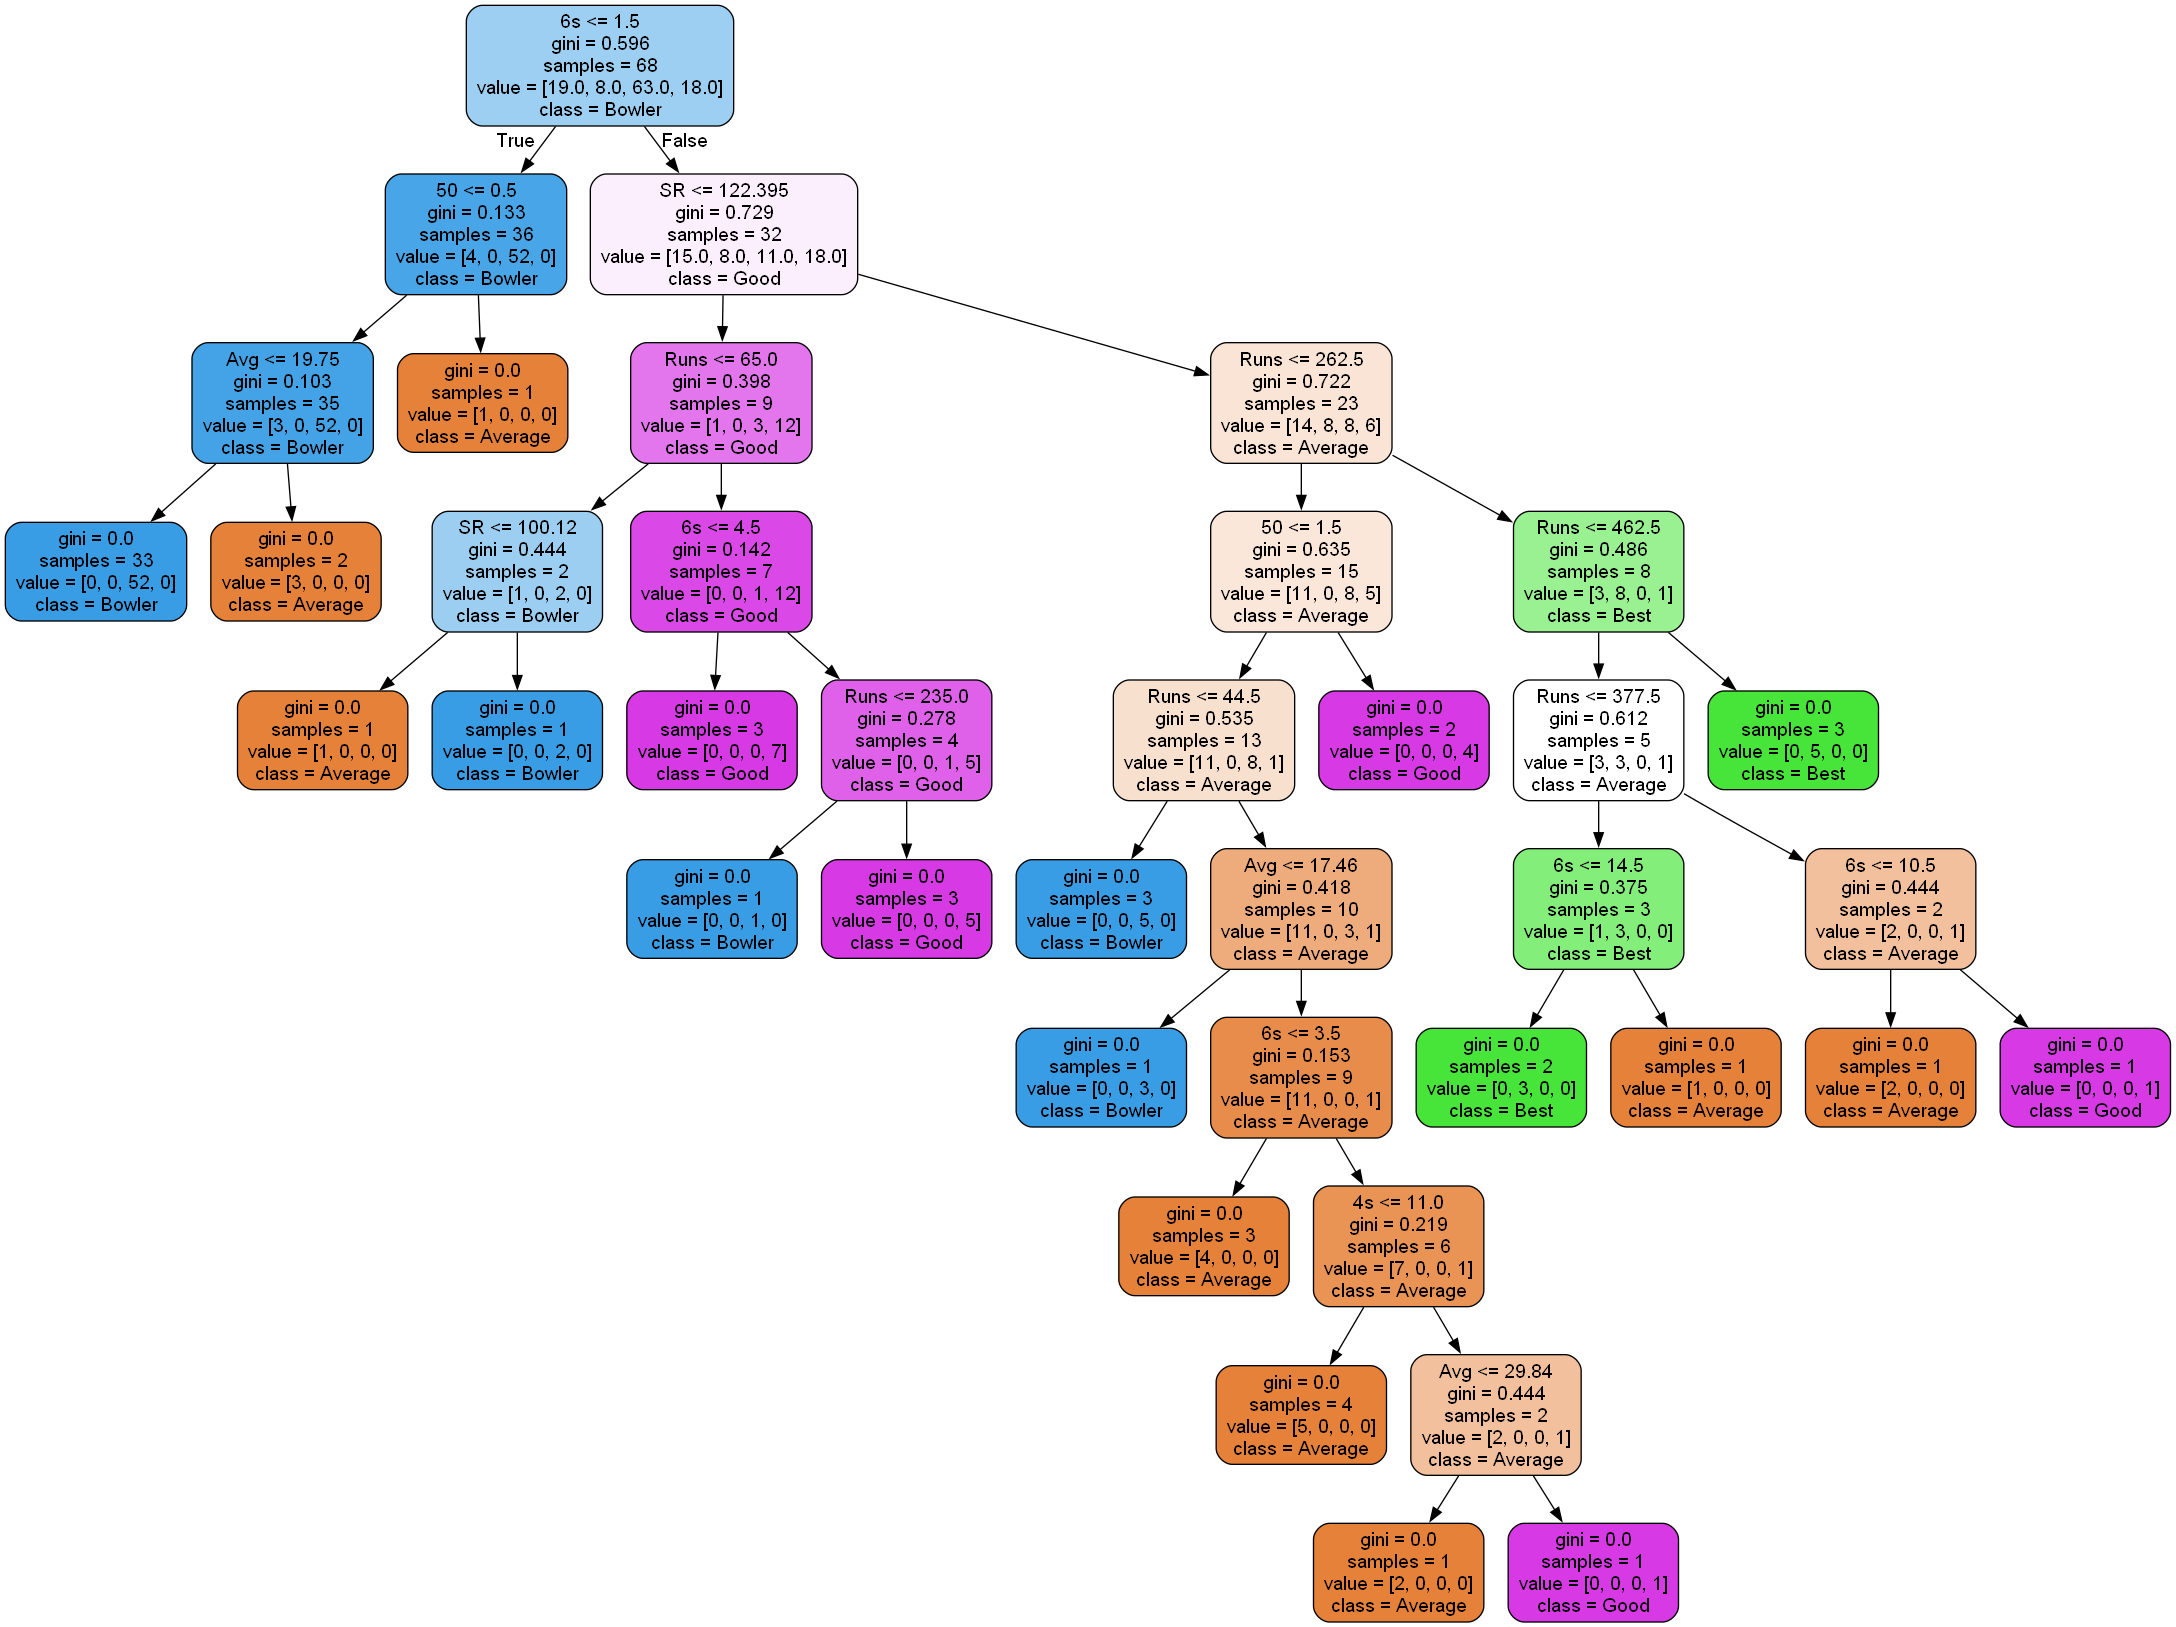

In [18]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

# Extract the decision tree from the Random Forest model
tree_index = 0  # Adjust this based on the desired tree number
tree = rf_classifier.estimators_[tree_index]

# Export the decision tree to a .dot file
export_graphviz(tree, out_file='tree.dot',
                feature_names=X.columns,
                class_names=rf_classifier.classes_,
                rounded=True,
                filled=True)

# Convert the .dot file to a .png image
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Display the decision tree image
Image(filename='tree.png')


In [15]:
df

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Category
0,1,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38,Best
1,2,David Warner,17,17,3,848,93*,60.57,560,151.42,0,9,88,31,Best
2,3,AB de Villiers,16,16,3,687,129*,52.84,407,168.79,1,6,57,37,Best
3,4,Gautam Gambhir,15,15,2,501,90*,38.53,411,121.89,0,5,54,6,Good
4,5,Shikhar Dhawan,17,17,4,501,82*,38.53,429,116.78,0,4,51,8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,Swapnil Singh,1,1,0,0,0*,0.00,1,0.00,0,0,0,0,Bowler
132,133,Unmukt Chand,1,1,0,0,0*,0.00,4,0.00,0,0,0,0,Bowler
133,134,Adam Zampa,5,1,0,0,0*,0.00,1,0.00,0,0,0,0,Bowler
134,135,Shivil Kaushik,7,2,1,0,0*,0.00,1,0.00,0,0,0,0,Bowler


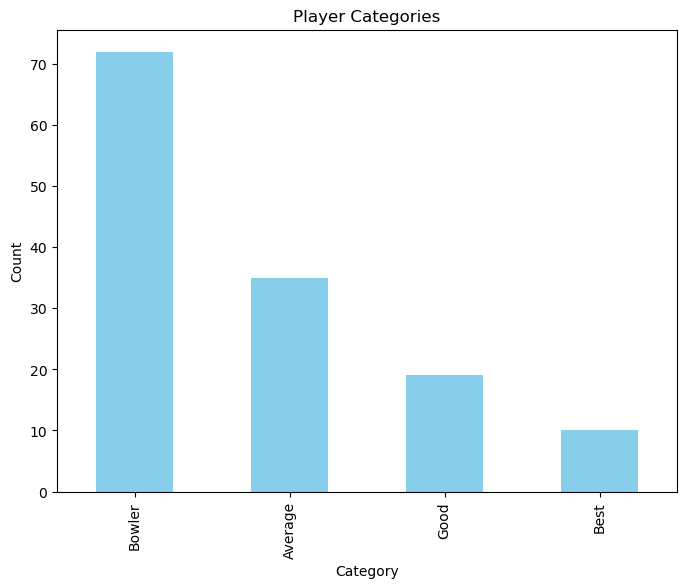

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Player Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [20]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

     Average       1.00      1.00      1.00        13
        Best       1.00      0.50      0.67         2
      Bowler       1.00      1.00      1.00        10
        Good       0.75      1.00      0.86         3

    accuracy                           0.96        28
   macro avg       0.94      0.88      0.88        28
weighted avg       0.97      0.96      0.96        28

